# Analiza eksploracyjna

09.01.2020
<br>
Aleksei Haidukevich, Joanna Smolska

Wczytanie niezbędnych pakietów.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Wczytanie danych i wyświetlenie pierwszych pięciu wierszy.

In [2]:
df = pd.read_excel('../data/main.xlsx', header=0)
df.head()
# df

,country,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
0,Austria,8858775,39.7,10.4,18.40,71.4,39.6,21.688730,1500.00,0.1
1,Belgium,11467923,21.2,18.0,20.55,74.5,48.2,19.798485,1501.82,1.8
2,Bulgaria,7000039,9.5,13.0,6.68,66.4,33.4,40.456639,184.07,1.9
3,Croatia,4076246,16.5,11.2,9.02,60.7,37.9,25.021464,395.61,1.4
4,Cyprus,875898,22.4,30.2,8.85,76.3,22.4,39.968136,870.00,1.4


## Opis cech

`country`

Dane o 33 krajach, 28 z których są w UE, pozostałe kraje są nie są technicznie członkami UE (Iceland, Norway, Turkey, Switzerland, Serbia).

`population`

Populacja kraju (1 stycznia 2019).

`happiness`

Procent populacji (16+ lat), który okreslił zadowolenie z życia w swoim kraju jako "High" podczas ankiety 2018 roku.

`bad_conditions`

Procent populacji, który mieszka w złych warunkach (leaking roof, damp walls, rot in window frames, itp.) w 2019 roku.

`culture`

Procent populacji (16+ lat), który bierze udział w wydarzeniach kulturalnych (kino, teatr, wydarzenia sportowe, itp.) minimum 4 razy za 2015 rok.


`health_estimate`

Procent populacji (16+ lat), który okreslił stan własnego zdrowia jako "good" albo "very good" podczas ankiety 2018 roku.


`commute`

Średni czas dojazdu od doma do pracy w jedną stronę w 2015.

`education_underachievements`

Procent wśród 15latków którym nie udało się otrzymać poziom 2 (‘basic skills level’) na skali PISA w trzech dziedzinach (czytanie, matematyka, nauki). Skala PISA dąży do oceny poziomu edukacji w kraju.

`minimum_wage`

Minimalny zarobek (EUR) zatrudnionych pracowników w kraju na 1 stycznia 2015.

`unmet_medical_needs`

Procent populacji (16+ lat), który deklarował nieokazanie pomocy miedycznej w przypadku gdy jej potrzebował.


## Podstawowe informacje i miary dla analizowanych danych:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
country                        33 non-null object
population                     33 non-null int64
happiness                      33 non-null float64
bad_conditions                 33 non-null float64
culture                        33 non-null float64
health_estimate                33 non-null float64
commute                        33 non-null float64
education_underachievements    33 non-null float64
minimum_wage                   33 non-null float64
unmet_medical_needs            33 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 2.7+ KB


Oryginalne zestawy danych zostały zmodyfikowane aby końcowy zbiór danych nie posiadał NaN albo wartości zerowych. Najczęściej szukaliśmy danych w dodatkowych źródłach statystycznych (po za stroną Eurostat); w niektórych przypadkach uzupełnialiśmy wartościami średnimi.

In [4]:
df.describe()

,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
count,3.300000e+01,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,1.868718e+07,25.690909,15.118182,15.806061,67.596970,40.256061,23.497954,1011.973333,2.742424
std,2.505448e+07,10.182472,7.310030,7.050614,9.260551,7.137622,8.852588,768.780608,3.190320
min,3.569910e+05,7.500000,4.600000,4.400000,44.100000,22.400000,10.146950,184.070000,0.100000
25%,4.076246e+06,18.000000,10.400000,9.320000,61.600000,35.700000,17.749614,390.000000,0.800000
50%,8.542323e+06,24.600000,13.400000,15.700000,68.700000,39.600000,21.459401,756.700000,1.900000
75%,1.728216e+07,35.000000,18.000000,20.400000,74.500000,45.200000,27.153221,1461.850000,3.300000
max,8.301921e+07,43.200000,38.100000,30.850000,83.600000,52.500000,45.060331,3200.000000,16.400000


W przypadku cechy `population` oczekujemy skosność pozytywną, skoro mediana jest znacznie mniejsza od średniej wartości. To ma sens: więcej krajów ma mniejszą populację, tylko niektóre mają dużą.

Podobne skosności oczekujemy dla cech `bad_conditions`, `education_underachievements`, `minimum_wage`, `unmet_medical_needs`

Kraje, dla których dokonywana będzie analiza:

In [5]:
print(*list(df['country']), sep=', ')

Austria, Belgium, Bulgaria, Croatia, Cyprus, Czechia, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Norway, Poland, Portugal, Romania, Serbia, Slovakia, Slovenia, Spain, Sweden, Switzerland, Turkey, United Kingdom


## Wizualizacja rozkładu danych

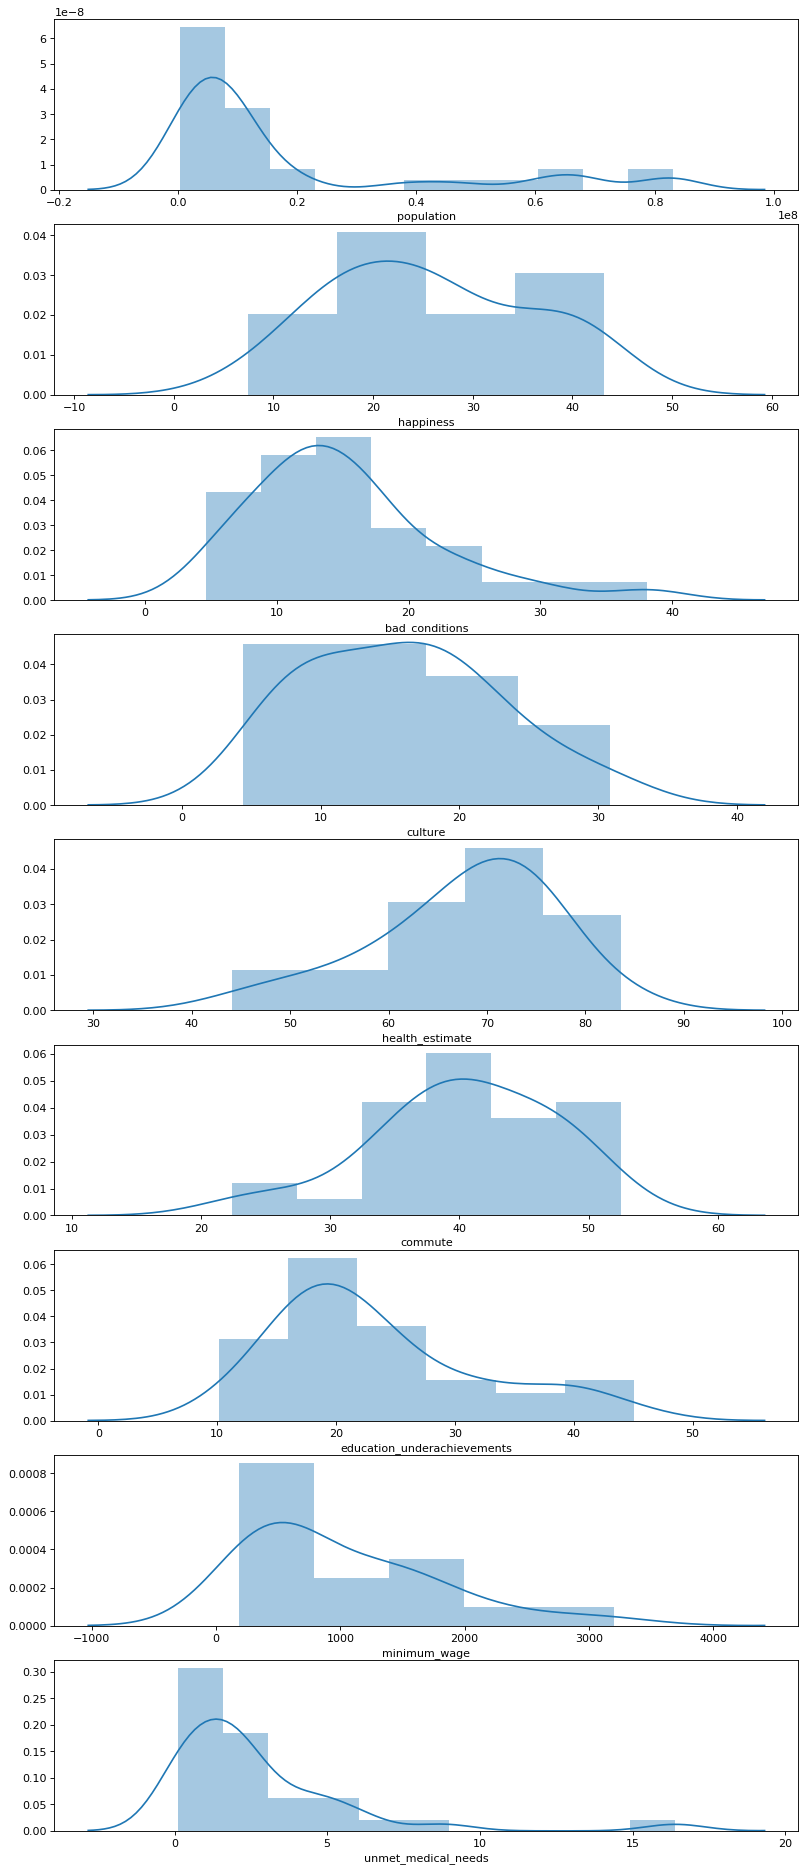

In [6]:
plt.figure(figsize=(12,30), dpi= 80)
i = 1
for col in df.columns.drop("country"):
    plt.subplot(9,1,i)
    i = i + 1
    sns.distplot(df.loc[:, col])

## Tablica korelacji poszczególnych cech:

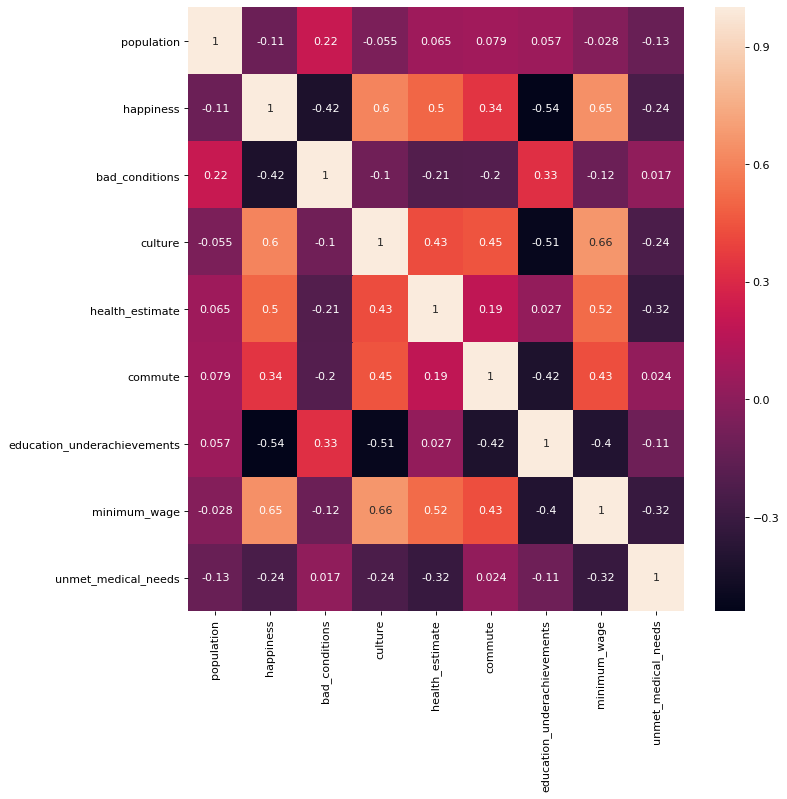

In [8]:
plt.figure(figsize=(10,10),dpi = 80)
sns.heatmap(df.corr(),annot = df.corr())

Z powyższej tablicy korelacji wyciągnąć można następujące wnioski:
<br> - poziom deklarowanego szczęścia jest silnie ujemnie skorelowany ze złymi warunkami mieszkalnymi (bad_conditions)
<br> - poziom deklarowanego szczęścia jest silnie dodatnio skorelowany z aktywnością kulturalną (culture)
<br> - poziom deklarowanego szczęścia jest silnie dodatnio skorelowany z dobrym stanem zdrowia (health_estimate)
<br> - poziom deklarowanego szczęścia jest dość mocno dodatnio skorelowany z czasem poświęconym na dojazdy (commute)
<br> - poziom deklarowanego szczęścia jest silnie ujemnie skorelowany z brakami w wykształceniu (education_underachievements)
<br> - poziom deklarowanego szczęścia jest silnie dodatnio skorelowany z wysokością płacy minimalnej (minimum_wage)
<br><br> Ponadto, poziom deklarowanego szczęścia nie jest skorelowany z populacją oraz jest słabo ujemnie skorelowany z częstością braku satysfakcjonującej opieki zdrowotnej.

In [12]:
df.corr()['happiness'].sort_values()

education_underachievements   -0.540846
bad_conditions                -0.420642
unmet_medical_needs           -0.243126
population                    -0.114750
commute                        0.344359
health_estimate                0.502139
culture                        0.603164
minimum_wage                   0.647731
happiness                      1.000000
Name: happiness, dtype: float64

Widać, żę najwięcej pozytywnego wpływu na zadowolenie z życia w kraju mają cechy `minimum_wage`, `culture`, `health_estimate`

## Zadanie badawcze

Zadanie badawcze opiera się na wyznaczeniu takiego modelu regresji, dla którego na podstawie wskazania wartości atrybutów mówiących o edukacji, aktywności kulturalnej, czy płacy minimalnej, wyestymowany będzie poziom deklarowanego szczęścia w danym kraju.